# Rock, Paper, Scissors ... with Python

This is some code that simulates a simple RPS game of $N$ players over $G$ many rounds. Individuals are initialised with each one randomly chosen strategy ("rock", "paper", or "scissors"). In each round, the program selects two random players, matches them up, and determines the winner. The loser adopts the strategy of its opponent. 

To visualise what is going on over time, I record the number of players of each strategy over time, and finally plot the result. 

In [2]:
import random
import pandas as pd

In [3]:
def compareStrategies(strategies, players):
    s = [strategies[players[0]], strategies[players[1]]]
    if "paper" in s and "rock" in s:
        return players[s.index("paper")], players[s.index("rock")]
    elif "rock" in s and "scissors" in s:
        return players[s.index("rock")], players[s.index("scissors")]
    else:
        return players[s.index("scissors")], players[s.index("paper")]


In [4]:
def count(strategies, possibleStrategies):
    counts = []
    for strategy in possibleStrategies:
        counts.append(strategies.count(strategy))
    return counts

<Axes: >

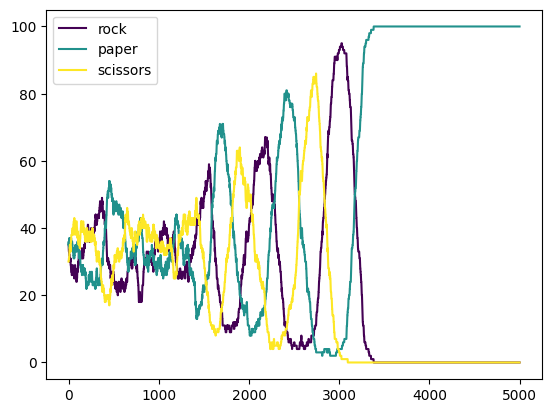

In [14]:
populationSize = 100
simulationTurns = 5000
possibleStrategies = ["rock", "paper", "scissors"]
strategies = random.choices(possibleStrategies, k=populationSize)
recordResults = pd.DataFrame(0, index=range(simulationTurns), columns=possibleStrategies)

for turn in range(simulationTurns):
    # Choose two random players
    player1, player2 = random.sample(range(populationSize), k=2)
    # Only play, if players have different strategies (else it's a tie)
    if strategies[player1] != strategies[player2]:
        # Determine who wins and who looses
        winner, looser = compareStrategies(strategies, [player1, player2])
        # Looser copies winning strategy
        strategies[looser] = strategies[winner]
    # Record current count of strategies
    recordResults.iloc[turn] = count(strategies, possibleStrategies)

recordResults.plot.line(cmap="viridis")